In [1]:
import pandas as pd
import matplotlib.pyplot as plt

xls = pd.ExcelFile('aggregated_backup.xlsx')
df = pd.read_excel(xls, 'Main')
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   GMDNAME                                 2142 non-null   object 
 1   KTNAME                                  2142 non-null   object 
 2   LAT_CNTR                                2142 non-null   float64
 3   LONG_CNTR                               2142 non-null   float64
 4   HEIGHT_CNTR                             2142 non-null   float64
 5   BEVDICHTE_SQKM_ 2019                    2142 non-null   float64
 6   AUSLAENDER_ANTEIL_2019                  2142 non-null   float64
 7   ALTERSVERTEILUNG_ANTEIL_0_19_ 2019      2142 non-null   float64
 8   ALTERSVERTEILUNG_ANTEIL_20_64_ 2019     2142 non-null   float64
 9   ALTERSVERTEILUNG_ANTEIL_65PLUS_ 2019    2142 non-null   float64
 10  PRIVATHAUSHALTE_2019                    2142 non-null   int6

In [2]:
#df = df[df["Anzahl Filialen Migros"] != 0]

<AxesSubplot:>

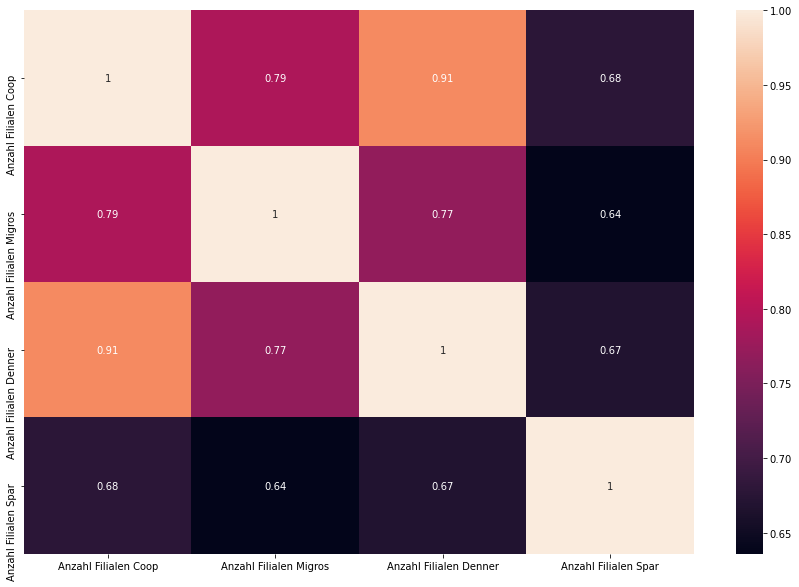

In [5]:
import seaborn as sns

correlation_matrix = df[["Anzahl Filialen Coop","Anzahl Filialen Migros","Anzahl Filialen Denner","Anzahl Filialen Spar"]].corr()
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(correlation_matrix, xticklabels = correlation_matrix.columns, yticklabels = correlation_matrix.columns, annot=True)

In [3]:
from sklearn.model_selection import train_test_split

Supermarkt = "Anzahl Filialen Spar"

X = df.drop(['GMDNAME', 'KTNAME', 'LAT_CNTR', 'LONG_CNTR', 'HEIGHT_CNTR',Supermarkt],axis=1)
y = df[Supermarkt]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

model = LinearRegression().fit(X_train, y_train)
y_pred= model.predict(X_test)
y_pred = y_pred.clip(min = 0)
y_pred = y_pred.round()

R2 = model.score(X_train, y_train)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
MAPE= mean_absolute_percentage_error(y_test, y_pred)

print(R2)
print(RMSE)
print(MAPE)

#print(y_pred)
#print(y_test)

0.6376218727737462
0.357109529660276
133076816360870.08


In [5]:
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

model = XGBRegressor().fit(X_train, y_train)
y_pred= model.predict(X_test)
y_pred = y_pred.clip(min = 0)
y_pred = y_pred.round()

R2 = model.score(X_train, y_train)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
MAPE= mean_absolute_percentage_error(y_test, y_pred)

print(R2)
print(RMSE)
print(MAPE)

#print(y_pred)
#print(y_test)

0.9998610345694783
0.5216912322774342
238137460856293.72


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

model = RandomForestRegressor().fit(X_train, y_train)
y_pred= model.predict(X_test)
y_pred = y_pred.clip(min = 0)
y_pred = y_pred.round()

R2 = model.score(X_train, y_train)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
MAPE= mean_absolute_percentage_error(y_test, y_pred)

print(R2)
print(RMSE)
print(MAPE)

#print(y_pred)
#print(y_test)

0.9263457054397881
0.4136098341043249
147084902293593.22


In [8]:
Supermarkets = ["Anzahl Filialen Migros", "Anzahl Filialen Coop", "Anzahl Filialen Denner", "Anzahl Filialen Spar"]

for supermarkt in Supermarkets:
    from sklearn.model_selection import train_test_split
    
    print(supermarkt)
    Supermarkt = supermarkt

    X = df.drop(['GMDNAME', 'KTNAME', 'LAT_CNTR', 'LONG_CNTR', 'HEIGHT_CNTR',Supermarkt],axis=1)
    y = df[Supermarkt]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
    
    
    
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

    model = LinearRegression().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred = y_pred.clip(min = 0)
    y_pred = y_pred.round()

    R2 = model.score(X_train, y_train)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    MAPE= mean_absolute_percentage_error(y_test, y_pred)
    
    print("LinearRegression")
    print("Der R2 beträgt: "+ str(R2))
    print("Der RMSE beträgt: "+ str(RMSE))
    print("Der MAPE beträgt: "+ str(MAPE))

    #print(y_pred)
    #print(y_test)
    
    
    from xgboost import XGBRegressor


    model = XGBRegressor().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred = y_pred.clip(min = 0)
    y_pred = y_pred.round()

    R2 = model.score(X_train, y_train)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    MAPE= mean_absolute_percentage_error(y_test, y_pred)
    
    print("XGBRegressor")
    print("Der R2 beträgt: "+ str(R2))
    print("Der RMSE beträgt: "+ str(RMSE))
    print("Der MAPE beträgt: "+ str(MAPE))
    #print(y_pred)
    #print(y_test)
    
    from sklearn.ensemble import RandomForestRegressor

    model = RandomForestRegressor().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred = y_pred.clip(min = 0)
    y_pred = y_pred.round()

    R2 = model.score(X_train, y_train)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    MAPE= mean_absolute_percentage_error(y_test, y_pred)

    print("RandomForest")
    print("Der R2 beträgt: "+ str(R2))
    print("Der RMSE beträgt: "+ str(RMSE))
    print("Der MAPE beträgt: "+ str(MAPE))
    
    print("")
    print("")
    #print(y_pred)
    #print(y_test)

Anzahl Filialen Migros
LinearRegression
Der R2 beträgt: 0.5306876482843224
Der RMSE beträgt: 1.5792184477442035
Der MAPE beträgt: 336403333510401.3
XGBRegressor
Der R2 beträgt: 0.999982704076284
Der RMSE beträgt: 1.9494067665223724
Der MAPE beträgt: 365838625192561.3
RandomForest
Der R2 beträgt: 0.8839176028148289
Der RMSE beträgt: 1.8634526151545248
Der MAPE beträgt: 412094083550241.5


Anzahl Filialen Coop
LinearRegression
Der R2 beträgt: 0.7733033682758528
Der RMSE beträgt: 0.6057613215710331
Der MAPE beträgt: 218662166781760.9
XGBRegressor
Der R2 beträgt: 0.9999728730769923
Der RMSE beträgt: 1.4455572815844195
Der MAPE beträgt: 327993250172641.3
RandomForest
Der R2 beträgt: 0.9180840635316428
Der RMSE beträgt: 1.5983184440966374
Der MAPE beträgt: 294352916821601.2


Anzahl Filialen Denner
LinearRegression
Der R2 beträgt: 0.8312867671221659
Der RMSE beträgt: 0.6666666666666666
Der MAPE beträgt: 235482333457280.97
XGBRegressor
Der R2 beträgt: 0.999972738848012
Der RMSE beträgt: 0.944